In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage import io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [14]:
image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)

In [20]:
x = regionprops(label_image)

In [22]:
x[0].coords

array([[14, 79],
       [15, 79],
       [15, 80],
       [16, 81]])

In [16]:
cleared

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

/home/zhenghu/anaconda3/envs/image/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


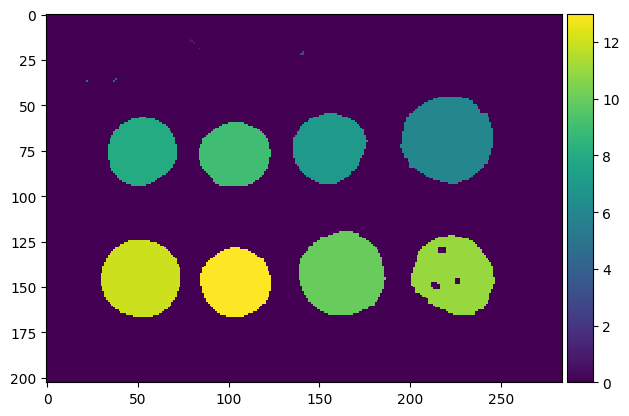

In [17]:
io.imshow(label_image)

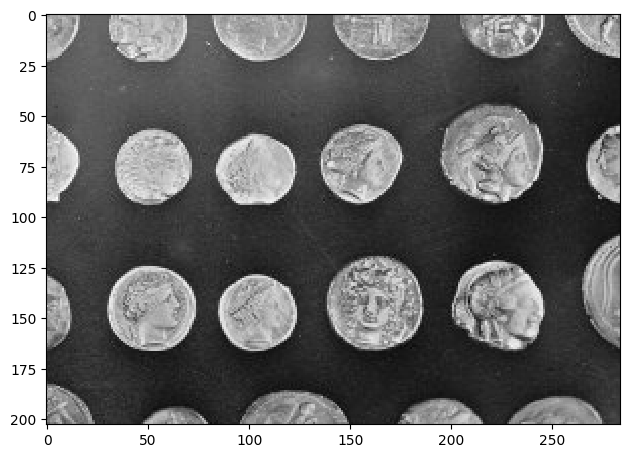

In [7]:
io.imshow(image)

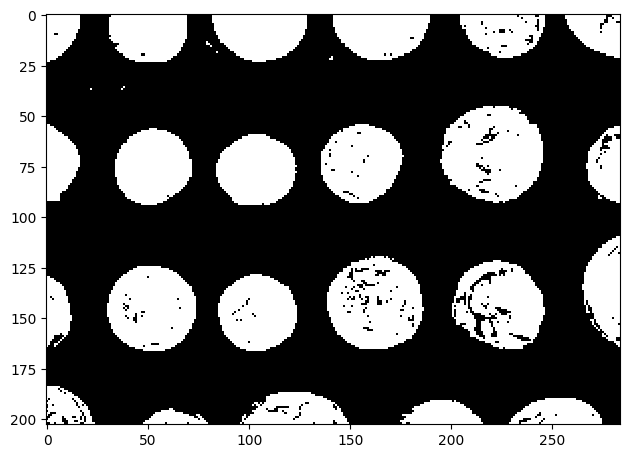

In [13]:
io.imshow(image > thresh)

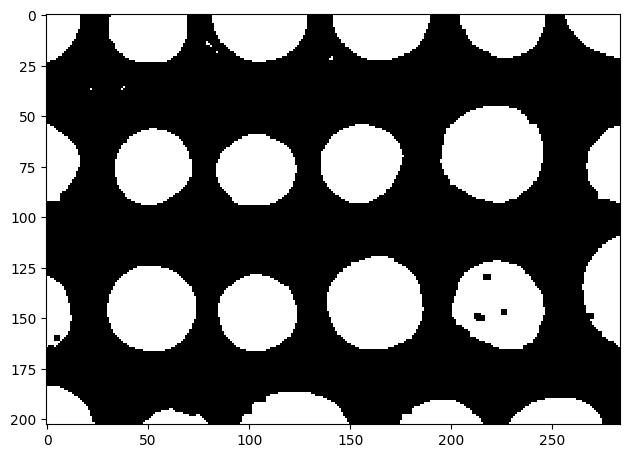

In [9]:
io.imshow(bw)

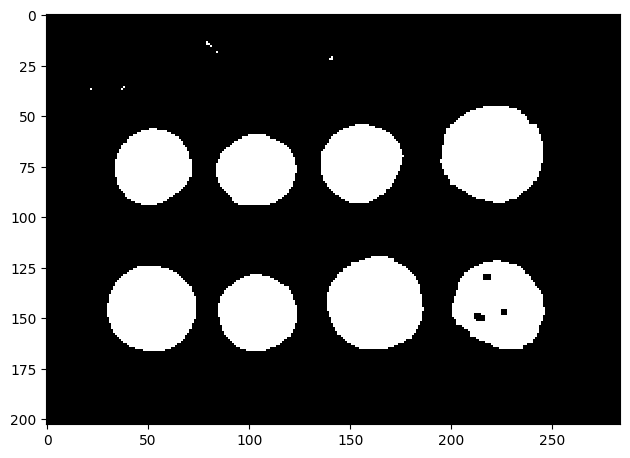

In [12]:
io.imshow(cleared)

In [3]:
image

array([[158, 141, 160, ..., 142, 199, 182],
       [162, 153, 168, ..., 193, 203, 136],
       [178, 173, 173, ..., 143, 179, 120],
       ...,
       [ 98, 117, 143, ...,  64,  65,  66],
       [128, 125, 153, ...,  63,  64,  63],
       [ 99, 102, 132, ...,  66,  62,  59]], dtype=uint8)

In [4]:
thresh

112

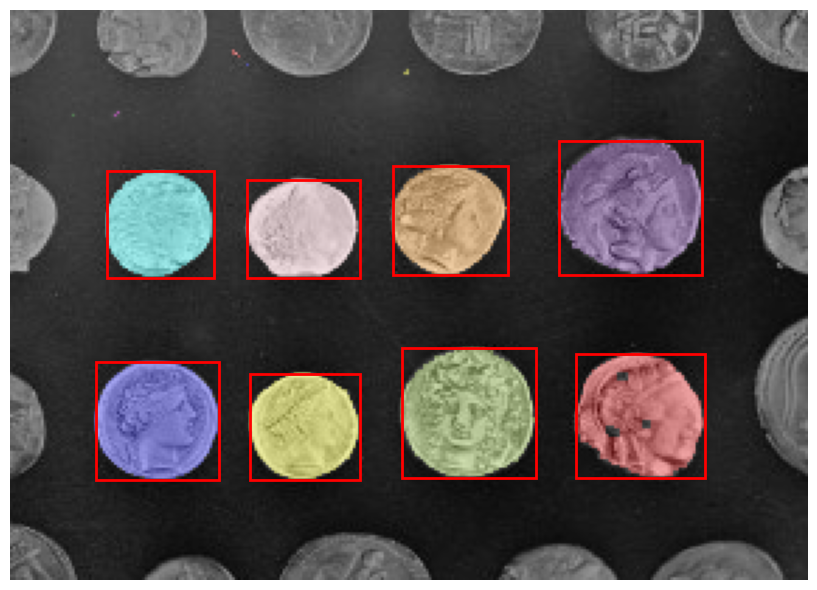

In [5]:



# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()